<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [12]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



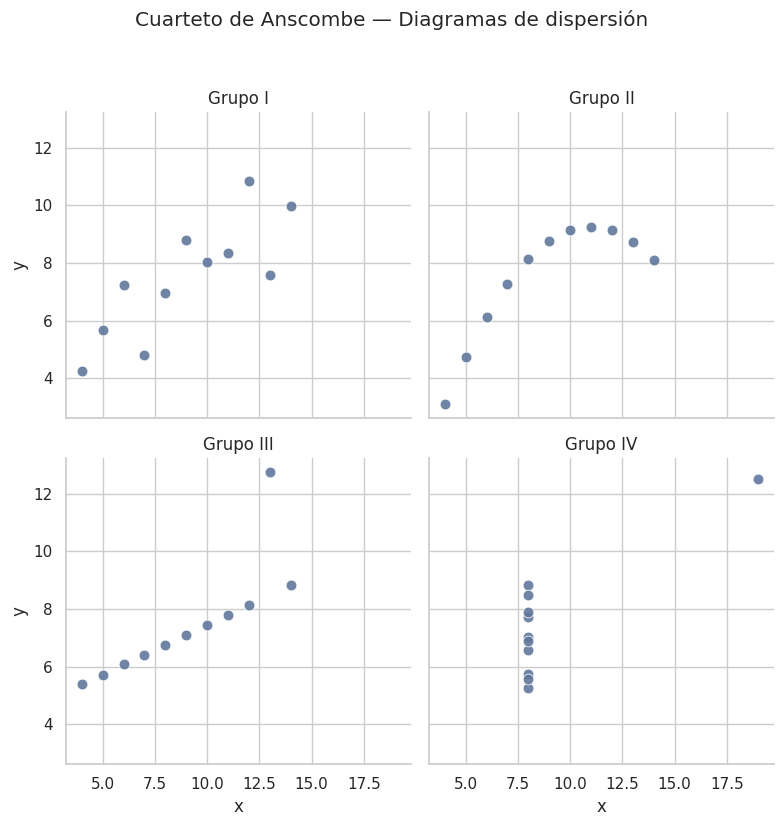

In [13]:
g = sns.FacetGrid(data, col="dataset", col_wrap=2, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, x="x", y="y", s=60, alpha=0.9, edgecolor="white", linewidth=0.6)
g.set_axis_labels("x", "y")
g.set_titles("Grupo {col_name}")
g.fig.suptitle("Cuarteto de Anscombe — Diagramas de dispersión", y=1.03)
plt.tight_layout()
plt.show()

Sí, se observan diferencias claras. El grupo I muestra una relación lineal positiva, el grupo II un patrón curvo, el grupo III es casi lineal pero con un punto atípico y el grupo IV presenta valores concentrados. Esto evidencia comportamientos distintos pese a tener estadísticas similares

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [14]:
summary = data.groupby("dataset")[["x", "y"]].describe().round(3)
print(summary)

            x                                            y                \
        count mean    std  min  25%  50%   75%   max count   mean    std   
dataset                                                                    
I        11.0  9.0  3.317  4.0  6.5  9.0  11.5  14.0  11.0  7.501  2.032   
II       11.0  9.0  3.317  4.0  6.5  9.0  11.5  14.0  11.0  7.501  2.032   
III      11.0  9.0  3.317  4.0  6.5  9.0  11.5  14.0  11.0  7.500  2.030   
IV       11.0  9.0  3.317  8.0  8.0  8.0   8.0  19.0  11.0  7.501  2.031   

                                         
          min    25%   50%   75%    max  
dataset                                  
I        4.26  6.315  7.58  8.57  10.84  
II       3.10  6.695  8.14  8.95   9.26  
III      5.39  6.250  7.11  7.98  12.74  
IV       5.25  6.170  7.04  8.19  12.50  


Las estadísticas muestran medias y dispersiones similares entre los cuatro grupos, pero difieren en rangos y valores extremos. el grupo II sugiere un comportamiento no lineal, mientras que los grupos III y IV presentan outliers influyentes, Lo que que, pese a estadísticas similares, sus distribuciones son distintas.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



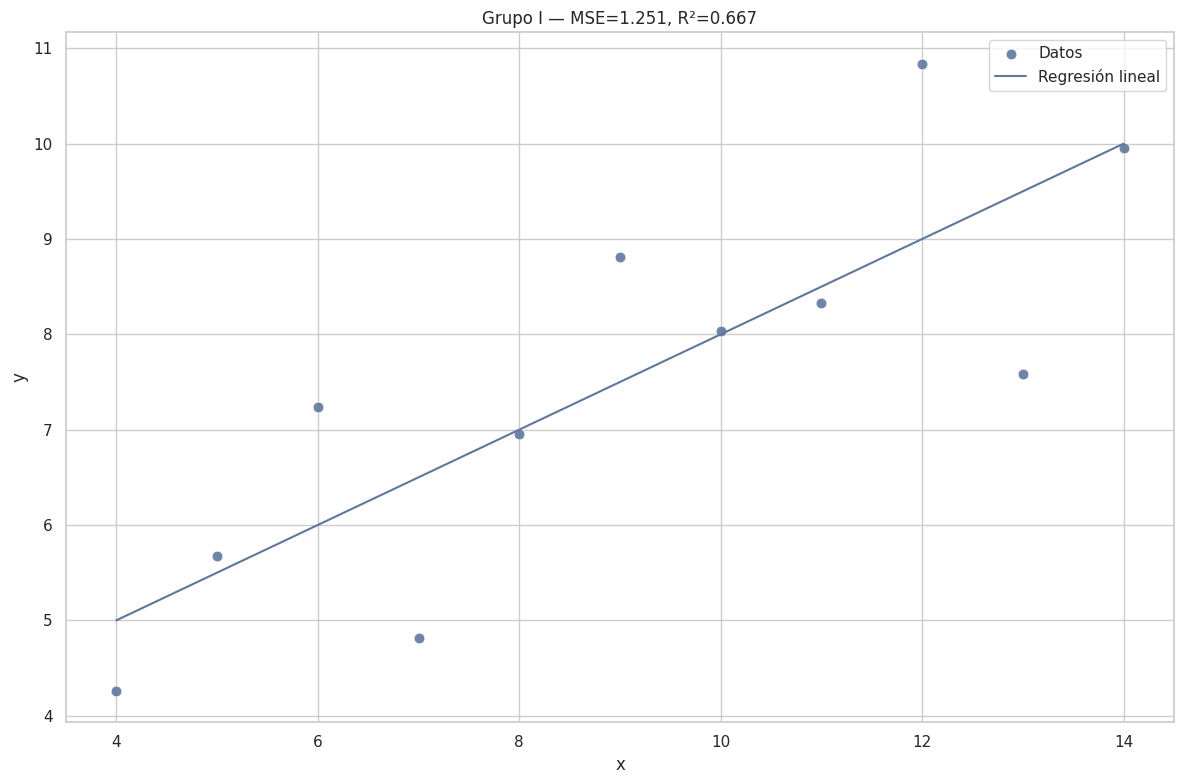

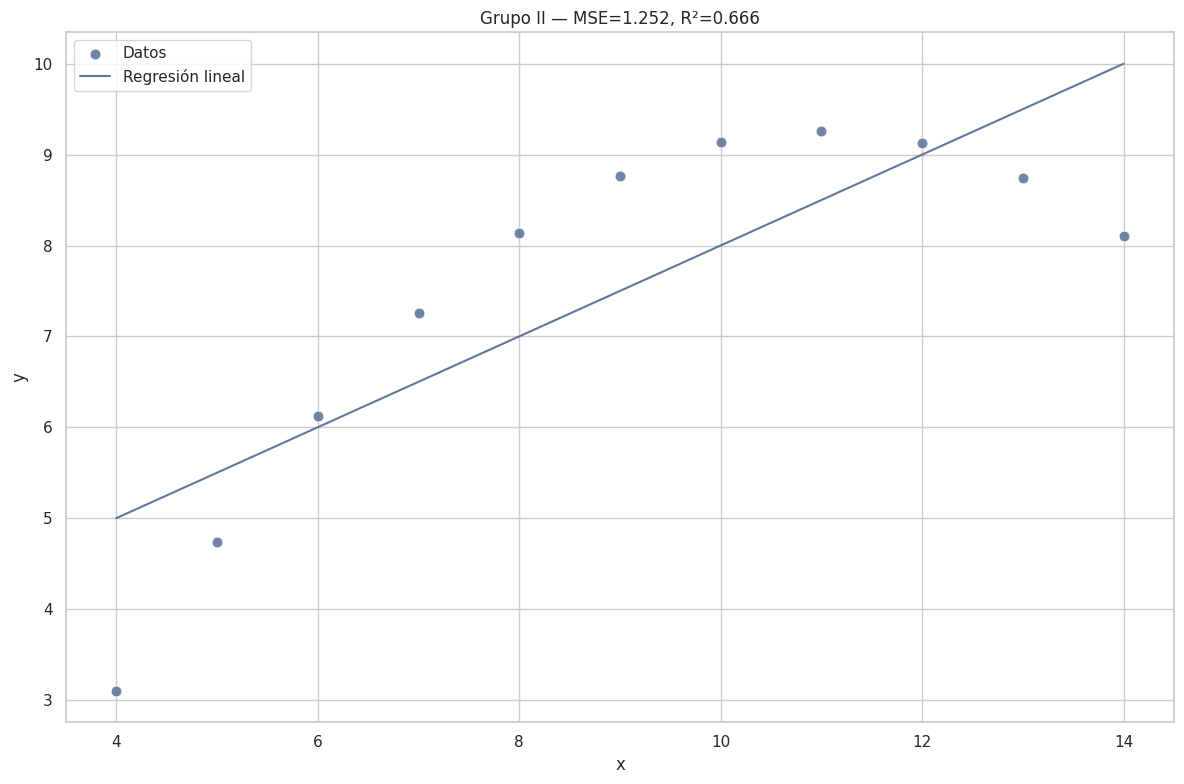

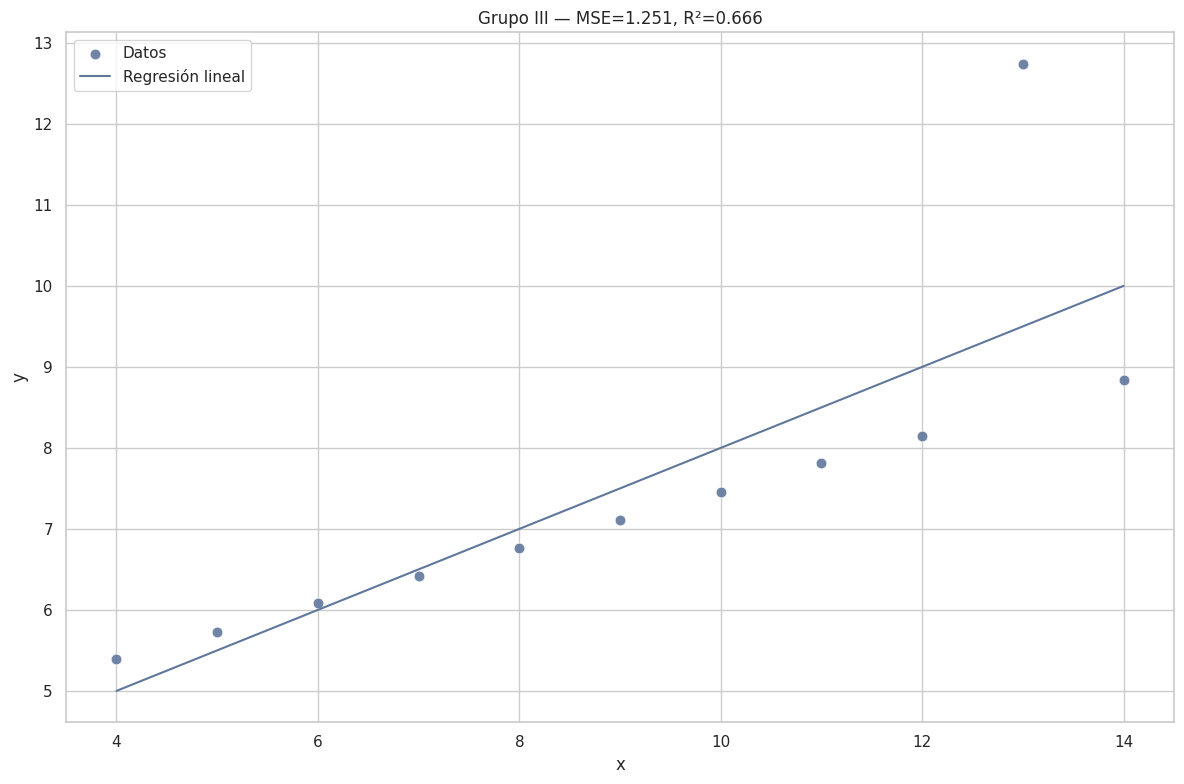

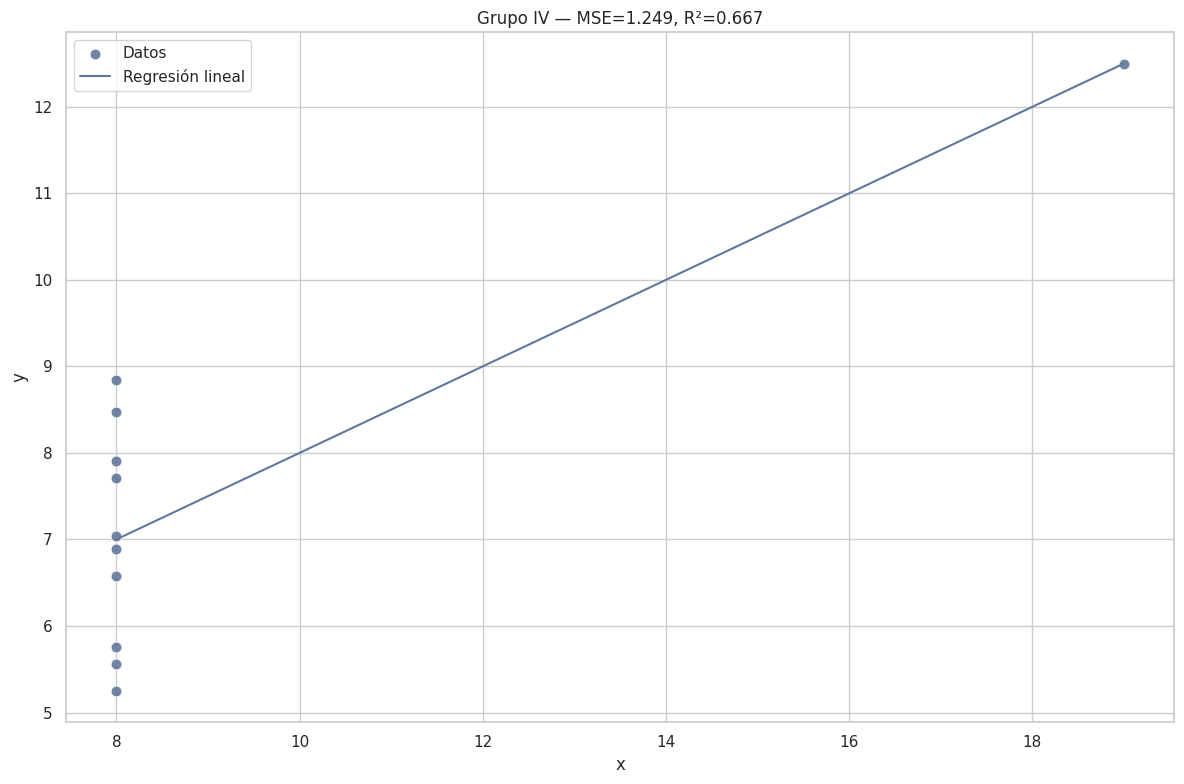

           MSE     R2  intercepto  pendiente
dataset                                     
I        1.251  0.667       3.000        0.5
II       1.252  0.666       3.001        0.5
III      1.251  0.666       3.002        0.5
IV       1.249  0.667       3.002        0.5


In [15]:
resultados = []
for group in sorted(data['dataset'].unique()):
    sub = data[data['dataset'] == group].copy()
    X = sub[['x']].values
    y = sub['y'].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    resultados.append({"dataset": group, "MSE": mse, "R2": r2,
                       "intercepto": model.intercept_, "pendiente": model.coef_[0]})

    order = np.argsort(X.ravel())
    x_sorted = X.ravel()[order].reshape(-1, 1)
    y_line = model.predict(x_sorted)
    plt.scatter(X, y, s=60, alpha=0.9, edgecolor="white", linewidth=0.6, label="Datos")
    plt.plot(x_sorted, y_line, label="Regresión lineal")
    plt.title(f"Grupo {group} — MSE={mse:.3f}, R²={r2:.3f}")
    plt.xlabel("x"); plt.ylabel("y")
    plt.legend()
    plt.tight_layout()
    plt.show()
res_df = pd.DataFrame(resultados).set_index("dataset").round(3)
print(res_df)


Pese a que los cuatro grupos muestran valores similares de MSE y R², la calidad del ajuste lineal varía. En el grupo I la recta representa bien la tendencia, en el grupo II la relación es no lineal y el modelo falla, en el grupo III un outlier influyeen el ajuste y en el grupo IV la correlación depende de un único punto extremo. Esto muestra que métricas parecidas pueden ocultar comportamientos distintos.


4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RANSACRegressor
mejoras = []
for group in sorted(data['dataset'].unique()):
    sub = data[data['dataset'] == group].copy()
    X = sub[['x']].values
    y = sub['y'].values

    if group == "II":
        model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
        x_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
    elif group in ("III", "IV"):
        model = RANSACRegressor(LinearRegression(), random_state=0)
        x_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
    else:
        model = LinearRegression()
        x_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    mejoras.append({"dataset": group, "MSE_mejorado": mse, "R2_mejorado": r2})
    y_line = model.predict(x_plot)
    plt.scatter(X, y, s=60, alpha=0.9, edgecolor="white", linewidth=0.6, label="Datos")
    plt.plot(x_plot, y_line, label="Modelo propuesto")
    plt.title(f"Grupo {group} — Modelo alternativo")
    plt.xlabel("x"); plt.ylabel("y")
    plt.legend()
    plt.tight_layout()
    plt.show()
mejoras_df = pd.DataFrame(mejoras).set_index("dataset").round(3)
print(mejoras_df)

Estrategia que podria  mejorar el ejuste del modelo:\
La regresión polinomial en II captura la curvatura y mejora el ajuste frente al modelo lineal; en III y IV, la regresión robusta reduce el efecto de outliers, entregando líneas más representativas del patrón central; en I, el modelo lineal ya era adecuado